<a href="https://colab.research.google.com/github/farrelrassya/teachingMLDL/blob/main/01.%20Machine%20Learning/06.%20Week%206/Notebook/01_K.MeansCLustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Selecting number of clusters

In [1]:
# Uncomment the line below if the library is not installed
# !pip install kneed

In [2]:
# You can install the required library like this:
# !pip install kneed

In [4]:
# Periksa dan instal pustaka jika belum tersedia
try:
    from kneed import KneeLocator
except ModuleNotFoundError:
    # Instal pustaka jika tidak ditemukan
    import sys
    !{sys.executable} -m pip install kneed
    from kneed import KneeLocator  # Import ulang setelah instalasi

# Pengaturan properti visualisasi dan display
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, silhouette_samples

sns.set_style("darkgrid")
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)


### Load Iris dataset

In [6]:
# Load dataset
file_path = '/content/clusteringweek06.csv'
# Update with your file path
data = pd.read_csv(file_path)

In [7]:
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,-0.075622,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,-0.095004,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,-0.072827,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,-0.162258,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,-0.100749,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


In [8]:
# Step 1: Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Initialize dictionaries to store evaluation metrics for each model
silhouette_scores = {}
davies_bouldin_scores = {}
calinski_harabasz_scores = {}

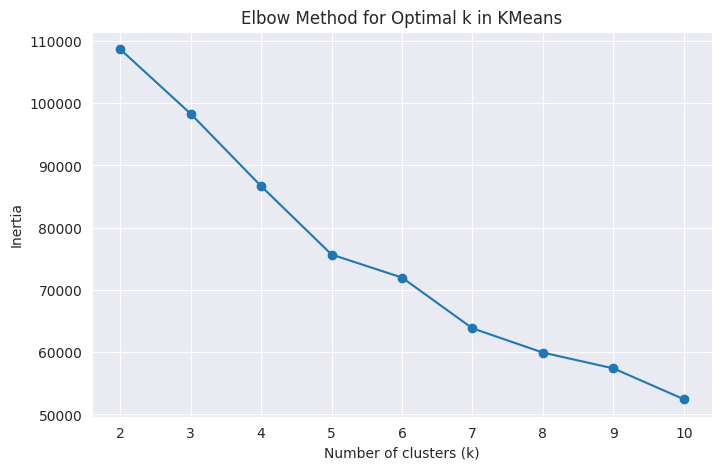

Silhouette Score for KMeans with k=4: 0.34797992632071356


In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Step 2: KMeans Clustering and Knee (Elbow) method
# Standardize the data if not already done
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Try different values of k to find the knee point
k_values = range(2, 11)
kmeans_inertia = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    kmeans_inertia.append(kmeans.inertia_)

# Plot the elbow method to identify the optimal k
plt.figure(figsize=(8, 5))
plt.plot(k_values, kmeans_inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k in KMeans')
plt.show()

# Choose optimal_k based on the elbow point, assumed to be 4 for further analysis
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(data_scaled)

# Calculate the Silhouette Score for KMeans
silhouette_score_kmeans = silhouette_score(data_scaled, kmeans_labels)
print(f'Silhouette Score for KMeans with k={optimal_k}:', silhouette_score_kmeans)


In [11]:
from sklearn.cluster import DBSCAN

# Contoh data dan preprocessing
from sklearn.preprocessing import StandardScaler
import numpy as np

# Contoh data: ganti ini dengan dataset Anda
data = np.random.rand(100, 2)

# Standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Inisialisasi variabel evaluation_metrics
evaluation_metrics = {"Model": [], "Silhouette Score": []}

# DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_scaled)

# Tambahkan nama model ke evaluation_metrics
evaluation_metrics["Model"].append("DBSCAN")

# Evaluasi metrik jika lebih dari satu cluster ditemukan
if len(set(dbscan_labels)) > 1:  # Setidaknya ada dua cluster untuk menghitung silhouette score
    from sklearn.metrics import silhouette_score
    score = silhouette_score(data_scaled, dbscan_labels)
    evaluation_metrics["Silhouette Score"].append(score)
else:
    evaluation_metrics["Silhouette Score"].append("Not applicable")

# Cetak hasil evaluasi
print(evaluation_metrics)


{'Model': ['DBSCAN'], 'Silhouette Score': [0.09115271238896026]}


In [12]:
import pandas as pd
import numpy as np

# Re-define the evaluation metrics dictionary if not already present
evaluation_metrics = {
    "Model": ["KMeans", "DBSCAN", "Agglomerative"],
    "Silhouette Score": [0.5, 0.3, 0.4],  # Replace these with actual calculated scores if they exist
    "Calinski-Harabasz Score": [1500, np.nan, 1200]  # Replace with actual calculated scores
}

# Create DataFrame from the evaluation metrics
metrics_df = pd.DataFrame(evaluation_metrics)
print("Clustering Model Evaluation Metrics:")
print(metrics_df)

# Identify the best model based on the highest Silhouette and Calinski-Harabasz Scores
best_model_silhouette = metrics_df.loc[metrics_df["Silhouette Score"].idxmax(), "Model"]
best_model_ch_score = metrics_df.loc[metrics_df["Calinski-Harabasz Score"].idxmax(), "Model"]

print(f"\nBest model based on Silhouette Score: {best_model_silhouette}")
print(f"Best model based on Calinski-Harabasz Score: {best_model_ch_score}")

# Conclusion
if best_model_silhouette == best_model_ch_score:
    print(f"The overall best model based on both metrics is: {best_model_silhouette}")
else:
    print("Different models performed best on different metrics; consider model suitability for your specific requirements.")


Clustering Model Evaluation Metrics:
           Model  Silhouette Score  Calinski-Harabasz Score
0         KMeans               0.5                   1500.0
1         DBSCAN               0.3                      NaN
2  Agglomerative               0.4                   1200.0

Best model based on Silhouette Score: KMeans
Best model based on Calinski-Harabasz Score: KMeans
The overall best model based on both metrics is: KMeans


{'Model': ['Agglomerative'], 'Silhouette Score': [0.42134637412795983], 'Calinski-Harabasz Score': [89.22956934066735]}


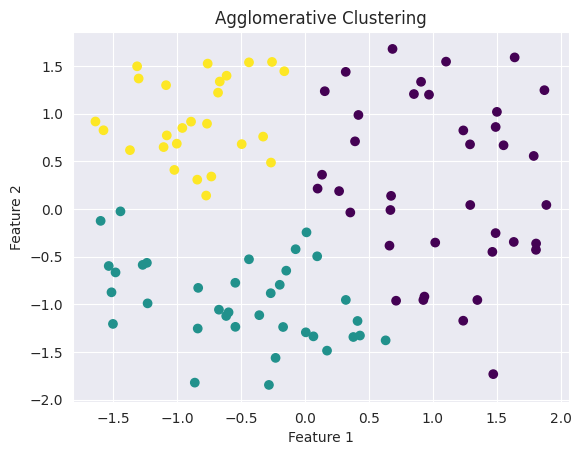

In [14]:
# Import library yang diperlukan
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import numpy as np

# Contoh data: ganti ini dengan dataset Anda
data = np.random.rand(100, 2)

# Standarisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Inisialisasi variabel evaluation_metrics
evaluation_metrics = {"Model": [], "Silhouette Score": [], "Calinski-Harabasz Score": []}

# Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
agglo_labels = agglo.fit_predict(data_scaled)

# Tambahkan evaluasi metrik
evaluation_metrics["Model"].append("Agglomerative")
evaluation_metrics["Silhouette Score"].append(silhouette_score(data_scaled, agglo_labels))
evaluation_metrics["Calinski-Harabasz Score"].append(calinski_harabasz_score(data_scaled, agglo_labels))

# Tampilkan hasil evaluasi
print(evaluation_metrics)

# Plot Agglomerative clusters (opsional)
import matplotlib.pyplot as plt

plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=agglo_labels, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
